In [1]:
%matplotlib notebook
from generating_TC import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from networkx.drawing.nx_agraph import graphviz_layout

def draw(net):
    """
    Draws the network net using dot layout.
    """
    pos = graphviz_layout(net, prog='dot')
    networkx.draw_networkx(net, pos, labels=net._labels)

# Sequential Generator

In the next chunk of code, set `n` to any (small) value and execute it. Clicking "next" in the plot will sequentially generate all BTC networks with `n` leaves. 

<IPython.core.display.Javascript object>


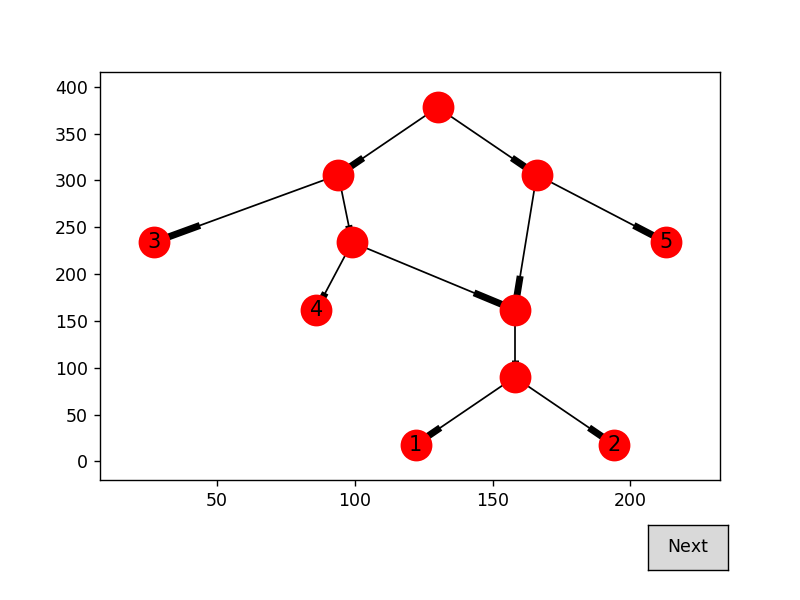

In [2]:
n = 5
taxa = [str(i+1) for i in range(n)]
btc = BTC_networks_generator(taxa)

fig, ax = plt.subplots()
xx=fig.get_axes()[0]
plt.subplots_adjust(bottom=0.2)

class Index(object):
    net = None

    def next(self, event):
        self.net = btc.__next__()
        plt.sca(xx)
        plt.cla()
        draw(self.net)

callback = Index()
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)

plt.show()

# Random Generator

In the next chunk of code, set `n` to any (small) value and execute it. Clicking "next" in the plot will generate random BTC networks with `n` leaves. 

<IPython.core.display.Javascript object>


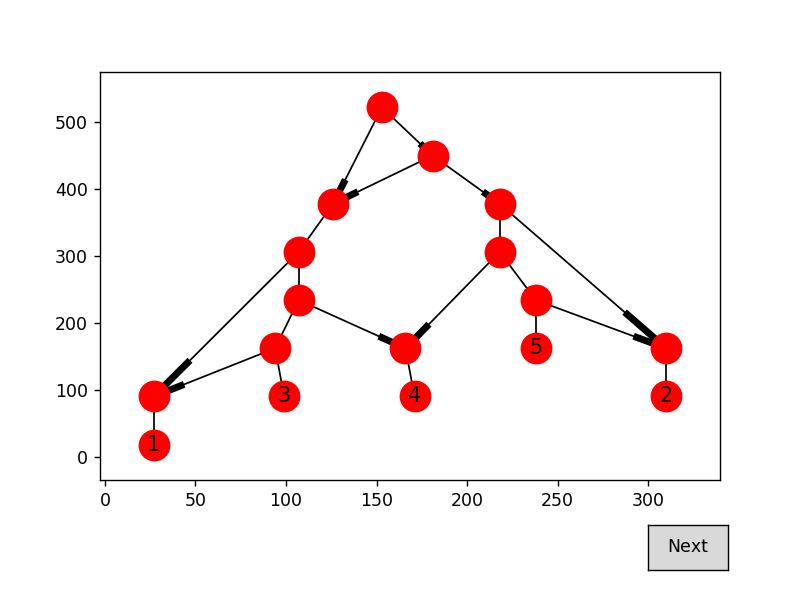

In [3]:
n = 5
taxa = [str(i+1) for i in range(n)]

fig, ax = plt.subplots()
xx=fig.get_axes()[0]
plt.subplots_adjust(bottom=0.2)

class Index(object):
    net = None

    def next(self, event):
        self.net = random_BTC_network(taxa)
        plt.sca(xx)
        plt.cla()
        draw(self.net)

callback = Index()
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)

plt.show()

# Some computations

In [4]:
taxa = ['a','b','c']
for net in BTC_networks_generator(taxa):
    print(net.eNewick())

((a,b),c);
((b,c),a);
((a,c),b);
(#1,(((a,b))#1,c));
((#1,c),((b)#1,a));
((#1,c),((a)#1,b));
((#1,((b)#1,c)),a);
(#1,(((a)#1,c),b));
(#1,(((b)#1,c),a));
((#1,((a)#1,c)),b);
(#1,(((#2,a))#1,((b)#2,c)));
(#1,(((#2,b))#1,((a)#2,c)));
(#2,(#1,((((b)#1,a))#2,c)));
(#2,(#1,((((a)#1,b))#2,c)));
(#2,(#1,(((a)#2,c),(b)#1)));
(#1,(#2,(((b)#2,c),(a)#1)));
(#1,(#2,(((a)#2,c),(b)#1)));
(#2,(#1,(((b)#2,c),(a)#1)));
((#1,(a,b)),(c)#1);
(#1,(((c)#1,b),a));
(#1,(((c)#1,a),b));
(((#1,b),(c)#1),a);
((#1,a),((c)#1,b));
(((#1,a),(c)#1),b);
((#1,(#2,a)),(((b)#2,c))#1);
((#1,(#2,b)),(((a)#2,c))#1);
(#1,(#2,((((a)#2,c))#1,b)));
(#1,(#2,((((b)#2,c))#1,a)));
(#2,((#1,b),(((a)#2,c))#1));
(#2,((#1,a),(((b)#2,c))#1));
((#1,((a)#1,b)),c);
(#1,((a)#1,(b,c)));
(((#1,b),c),(a)#1);
(#1,(((a,c))#1,b));
(#2,(((#1,((a)#1,b)))#2,c));
(#1,((#2,((b)#2,c)),(a)#1));
((#2,(((#1,b))#2,c)),(a)#1);
(#1,(((#2,((a)#2,c)))#1,b));
((#2,(#1,((a)#1,b))),(c)#2);
(#2,(#1,(((c)#2,b),(a)#1)));
(#2,(((#1,b),(c)#2),(a)#1));
(#2,(#1,((((c)#2,a

In [5]:
len(list(BTC_networks_generator(taxa)))

66

In [6]:
for _ in range(5):
    print(random_BTC_network(taxa).eNewick())

(#1,(((a,c))#1,b));
(#2,(#1,((((b)#1,a))#2,c)));
(#2,(#1,((((c)#2,a))#1,b)));
(#2,((#1,a),(((b)#2,c))#1));
((#2,((#1,a),(b)#1)),(c)#2);


In [7]:
net = random_BTC_network(taxa)
offspring = BTC_offspring_generator(net,'d')
for newnet in offspring:
    print(newnet.eNewick())

((#2,(((#1,a),(b)#1),d)),(c)#2);
((#2,((#1,a),((b,d))#1)),(c)#2);
((#2,(((#1,a),d),(b)#1)),(c)#2);
(((#2,((#1,a),(b)#1)),d),(c)#2);
((#2,((#1,(a,d)),(b)#1)),(c)#2);
((#2,((#1,a),(b)#1)),((c,d))#2);
(((#2,((#1,a),(b)#1)),(c)#2),d);
((#2,(#3,((((#1,a),(b)#1))#3,d))),(c)#2);
((#2,((#1,a),((#3,((b)#3,d)))#1)),(c)#2);
((#2,((#3,(((#1,a))#3,d)),(b)#1)),(c)#2);
((#3,(((#2,((#1,a),(b)#1)))#3,d)),(c)#2);
((#2,((#1,(#3,((a)#3,d))),(b)#1)),(c)#2);
((#2,((#1,a),(b)#1)),((#3,((c)#3,d)))#2);
(#3,((((#2,((#1,a),(b)#1)),(c)#2))#3,d));
((#2,((#3,((#1,a),(b)#1)),(d)#3)),(c)#2);
((#2,(#3,((#1,a),(((d)#3,b))#1))),(c)#2);
((#2,(#3,(((#1,a),(d)#3),(b)#1))),(c)#2);
((#3,(#2,(((#1,a),(b)#1),(d)#3))),(c)#2);
((#2,(#3,((#1,((d)#3,a)),(b)#1))),(c)#2);
((#2,(#3,((#1,a),(b)#1))),(((d)#3,c))#2);
(#3,((#2,(((#1,a),(b)#1),(d)#3)),(c)#2));
((#2,((#1,a),(((#3,b),(d)#3))#1)),(c)#2);
((#2,((#3,(#1,a)),(((d)#3,b))#1)),(c)#2);
((#3,(#2,((#1,a),(((d)#3,b))#1))),(c)#2);
((#2,((#1,(#3,a)),(((d)#3,b))#1)),(c)#2);
((#2,((#1,a),